# Set-Up

In [1]:
import pandas as pd

In [14]:
ref_rates = "ref_rates.xlsx"

In [16]:
tabs = pd.ExcelFile(ref_rates).sheet_names 
tabs

['info', 'data']

In [19]:
info_df = pd.read_excel(ref_rates, "info")

In [21]:
info_df.head()

,description,ticker (FRED)
0,Tbill 3-month,DTB3
1,Fed Funds Effective,DFF
2,SOFR,SOFR


In [25]:
data_df = pd.read_excel(ref_rates, "data")

In [27]:
data_df.head()

,date,DTB3,DFF,SOFR
0,2018-01-01,NaN,1.33,NaN
1,2018-01-02,1.42,1.42,NaN
2,2018-01-03,1.39,1.42,NaN
3,2018-01-04,1.39,1.42,NaN
4,2018-01-05,1.37,1.42,NaN


In [29]:
data_df.shape

(2714, 4)

# Q1

<AxesSubplot:xlabel='date'>

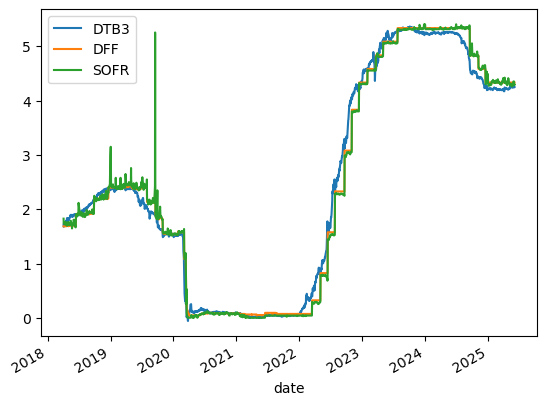

In [58]:
data_df = data_df.set_index('date')
data_df.plot()

# Q2

In [65]:
# Drop row if any of the fields are missing

df = data_df.dropna() # Alt: data_df.dropna(inplace=True), more efficient but modifies original df
df

,DTB3,DFF,SOFR
date,,,
2018-04-03,1.72,1.69,1.83
2018-04-04,1.68,1.69,1.74
2018-04-05,1.69,1.69,1.75
2018-04-06,1.70,1.69,1.75
2018-04-09,1.73,1.69,1.75
...,...,...,...
2025-05-30,4.25,4.33,4.35
2025-06-02,4.25,4.33,4.35
2025-06-03,4.24,4.33,4.32


In [66]:
# Correlation between 3 metrics:
df.corr(method="pearson")

,DTB3,DFF,SOFR
DTB3,1.000000,0.994724,0.993079
DFF,0.994724,1.000000,0.999114
SOFR,0.993079,0.999114,1.000000


In [68]:
# Correlation between deltas
df.diff().corr(method="pearson")

,DTB3,DFF,SOFR
DTB3,1.000000,0.006034,0.036395
DFF,0.006034,1.000000,0.494998
SOFR,0.036395,0.494998,1.000000


# Q3

In [ ]:
# Visual Check - Plot lag plots: Plotting value at (t-1) with (t+1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

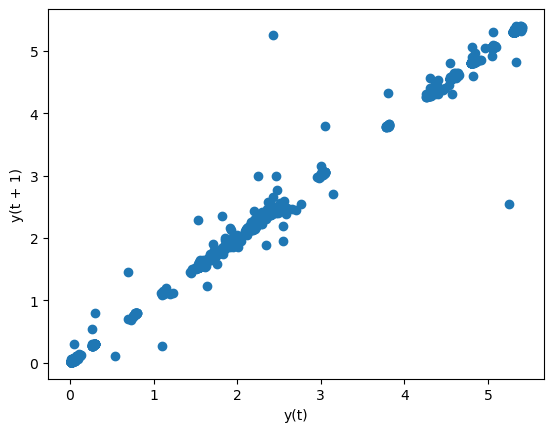

In [84]:
pd.plotting.lag_plot(df['SOFR'])

In [87]:
# Lag plot is (mostly) diagonal => some correlation present

In [116]:
df[['SOFR']].shift(1).head()

,SOFR
date,
2018-04-03,NaN
2018-04-04,1.83
2018-04-05,1.74
2018-04-06,1.75
2018-04-09,1.75


In [119]:
# Not sure how to do Q3, and Q4. todo: review module 2 and solution